In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/ACM_Project")

In [3]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split


In [45]:

X = joblib.load("data/inputs.pkl")

y_class = joblib.load("data/y_class.pkl")
y_score = joblib.load("data/y_score.pkl")

X.shape


(4112, 5029)

In [62]:
X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X,
    y_class,
    y_score,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)


In [47]:
pd.Series(y_class_train).value_counts()

,count
problem_class,
hard,1552
medium,1124
easy,613


In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    max_iter=600,
    n_jobs=-1
)

clf.fit(X_train, y_class_train)


LogisticRegression(max_iter=600, n_jobs=-1)

In [8]:
y_pred = clf.predict(X_test)
y_pred



array(['medium', 'hard', 'easy', 'hard', 'hard', 'medium', 'hard', 'hard',
       'hard', 'medium', 'hard', 'medium', 'hard', 'hard', 'hard',
       'medium', 'hard', 'easy', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'easy',
       'hard', 'medium', 'easy', 'hard', 'hard', 'easy', 'hard', 'hard',
       'medium', 'hard', 'easy', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'medium', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'easy', 'easy', 'hard', 'hard', 'hard', 'easy', 'hard',
       'hard', 'hard', 'easy', 'hard', 'hard', 'hard', 'hard', 'medium',
       'easy', 'medium', 'hard', 'medium', 'medium', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'easy', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard'

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_class_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4860


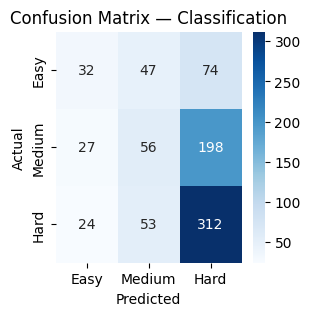

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_class_test, y_pred, labels=["easy", "medium", "hard"])

plt.figure(figsize=(3,3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Easy", "Medium", "Hard"],
    yticklabels=["Easy", "Medium", "Hard"],
    cmap="Blues"
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Classification")
plt.show()


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, y_pred))



              precision    recall  f1-score   support

        easy       0.39      0.21      0.27       153
        hard       0.53      0.80      0.64       389
      medium       0.36      0.20      0.26       281

    accuracy                           0.49       823
   macro avg       0.43      0.40      0.39       823
weighted avg       0.45      0.49      0.44       823



In [77]:
from sklearn.svm import SVC, LinearSVC

clf = LinearSVC(
     C = 1.5,
    class_weight= None,
     random_state=42,
    max_iter=600
)

clf.fit(X_train, y_class_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1.5, max_iter=600, random_state=42)

In [78]:
y_pred = clf.predict(X_test)
y_pred


array(['hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'easy', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'easy', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'easy', 'hard', 'hard', 'hard', 'easy', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
      

In [79]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_class_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4812


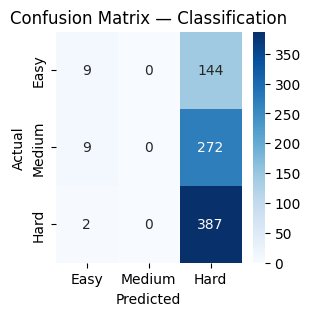

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_class_test, y_pred, labels=["easy", "medium", "hard"])

plt.figure(figsize=(3,3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Easy", "Medium", "Hard"],
    yticklabels=["Easy", "Medium", "Hard"],
    cmap="Blues"
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Classification")
plt.show()


In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, y_pred))



              precision    recall  f1-score   support

        easy       0.45      0.06      0.10       153
        hard       0.48      0.99      0.65       389
      medium       0.00      0.00      0.00       281

    accuracy                           0.48       823
   macro avg       0.31      0.35      0.25       823
weighted avg       0.31      0.48      0.33       823



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train,y_class_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [81]:
preds = rf.predict(X_test)
accuracy = accuracy_score(y_class_test,preds)
accuracy

0.5273390036452005

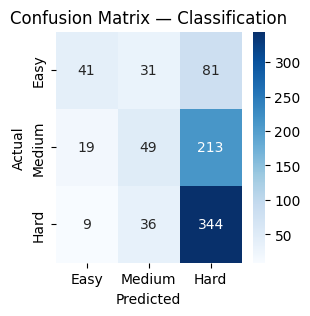

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_class_test, preds, labels=["easy", "medium", "hard"])

plt.figure(figsize=(3,3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Easy", "Medium", "Hard"],
    yticklabels=["Easy", "Medium", "Hard"],
    cmap="Blues"
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Classification")
plt.show()


In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, preds))



              precision    recall  f1-score   support

        easy       0.59      0.27      0.37       153
        hard       0.54      0.88      0.67       389
      medium       0.42      0.17      0.25       281

    accuracy                           0.53       823
   macro avg       0.52      0.44      0.43       823
weighted avg       0.51      0.53      0.47       823



In [89]:
joblib.dump(rf,"models/classifier.pkl")


['models/classifier.pkl']

In [ ]:
from sklearn.svm import SVC

clf = SVC(
    C=1.0,
    kernel='rbf',
    class_weight=None,
    max_iter=10000,
    random_state=42
)

clf.fit(X_train, y_class_train)

SVC(max_iter=10000, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array(['hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
       'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 'hard',
      

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_class_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4739
